In [1]:
# main class
import random
from dataset import DatasetSplitter
import os
from images import _load, view_sample
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader

data_splitter = DatasetSplitter("kacpergregorowicz/house-plant-species")  # dataset download from kaggle
train_dir, val_dir, test_dir = data_splitter.get_split_paths()


/export/home/1junkher/infhome/Documents/private_projects/plant_prediction/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /export/home/1junkher/.cache/kagglehub/datasets/kacpergregorowicz/house-plant-species/versions/4


Loaded image: 185.png from class Ponytail Palm (Beaucarnea recurvata)


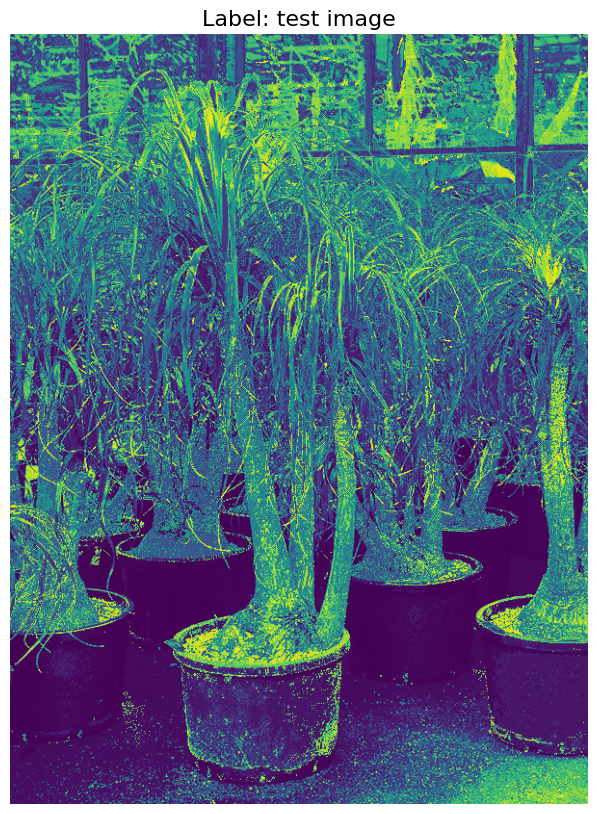

In [2]:
# check if loaded correctly :)

class_folders = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

if not class_folders:
    print("No classes found in train_dir.")
else:
    random_class = random.choice(class_folders)  # get random class
    class_path = os.path.join(train_dir, random_class)

    images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

    if not images:
        print(f"No images found in {class_path}.")
    else:
        random_image = random.choice(images)  # get random image
        image_path = os.path.join(class_path, random_image)

        # Load the image using _load function
        image_tensor = _load(image_path)

        print(f"Loaded image: {random_image} from class {random_class}")

view_sample(image_tensor, "test image") 

In [3]:
# convert to dataframe 

train_df = data_splitter.create_dataframe(train_dir)
val_df = data_splitter.create_dataframe(val_dir)
test_df = data_splitter.create_dataframe(test_dir)

print("Train DataFrame Sample:\n", val_df.head(10))


Train DataFrame Sample:
                                           image_path       label
0  /export/home/1junkher/.cache/kagglehub/dataset...  Schefflera
1  /export/home/1junkher/.cache/kagglehub/dataset...  Schefflera
2  /export/home/1junkher/.cache/kagglehub/dataset...  Schefflera
3  /export/home/1junkher/.cache/kagglehub/dataset...  Schefflera
4  /export/home/1junkher/.cache/kagglehub/dataset...  Schefflera
5  /export/home/1junkher/.cache/kagglehub/dataset...  Schefflera
6  /export/home/1junkher/.cache/kagglehub/dataset...  Schefflera
7  /export/home/1junkher/.cache/kagglehub/dataset...  Schefflera
8  /export/home/1junkher/.cache/kagglehub/dataset...  Schefflera
9  /export/home/1junkher/.cache/kagglehub/dataset...  Schefflera


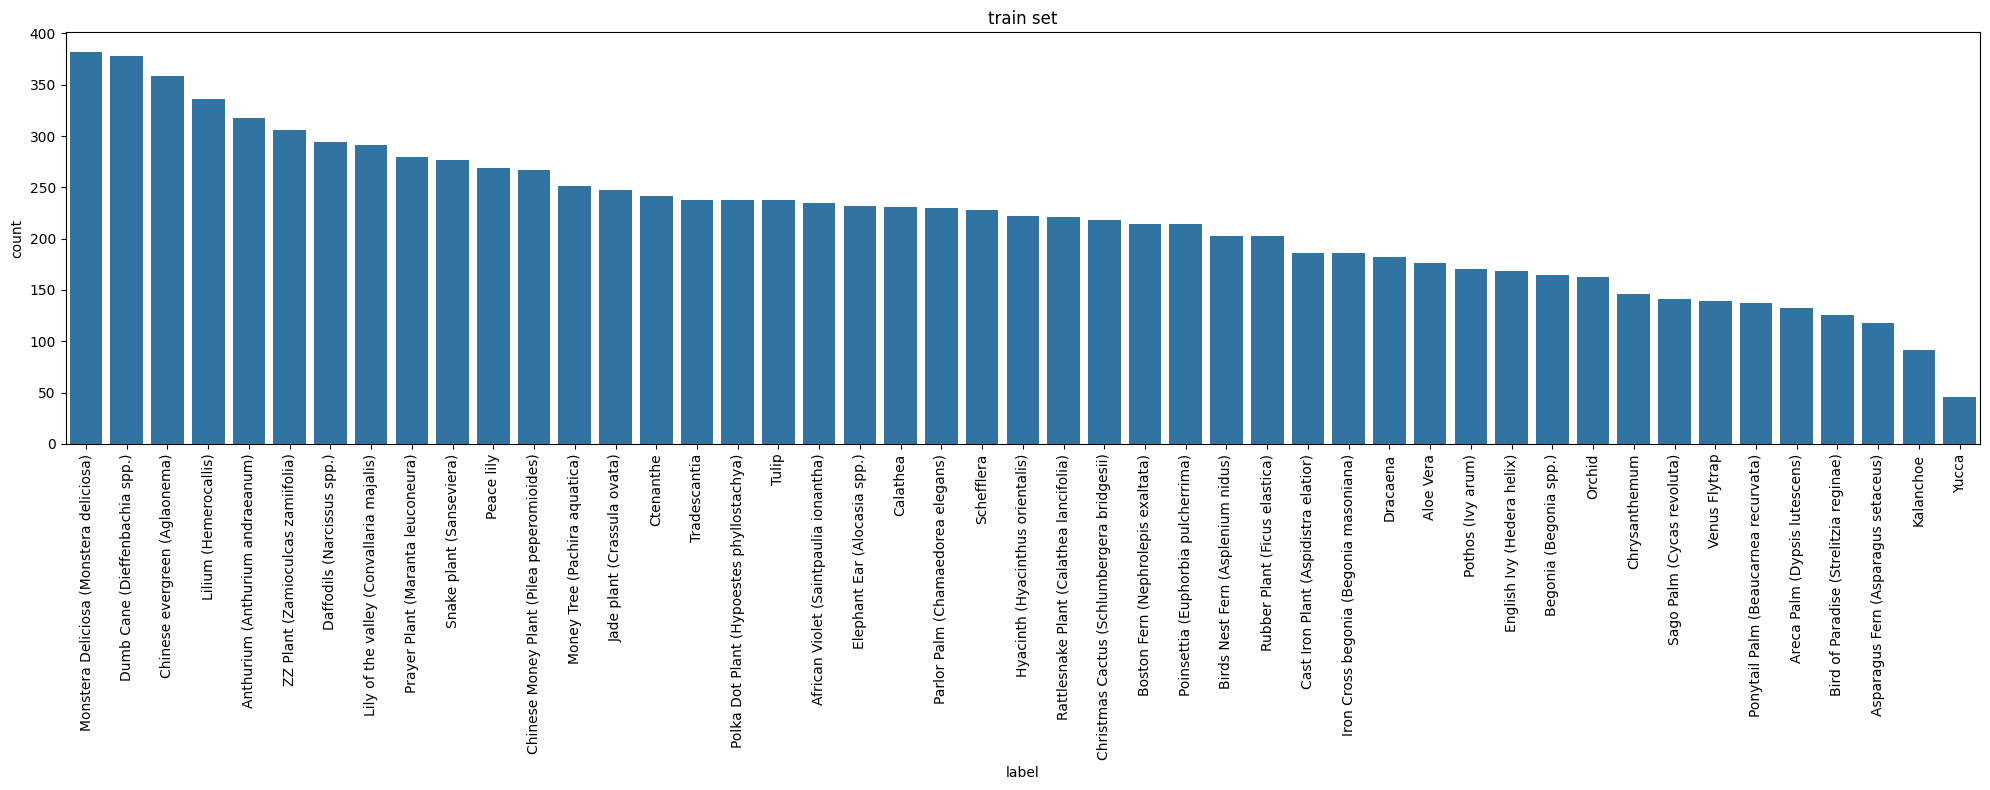

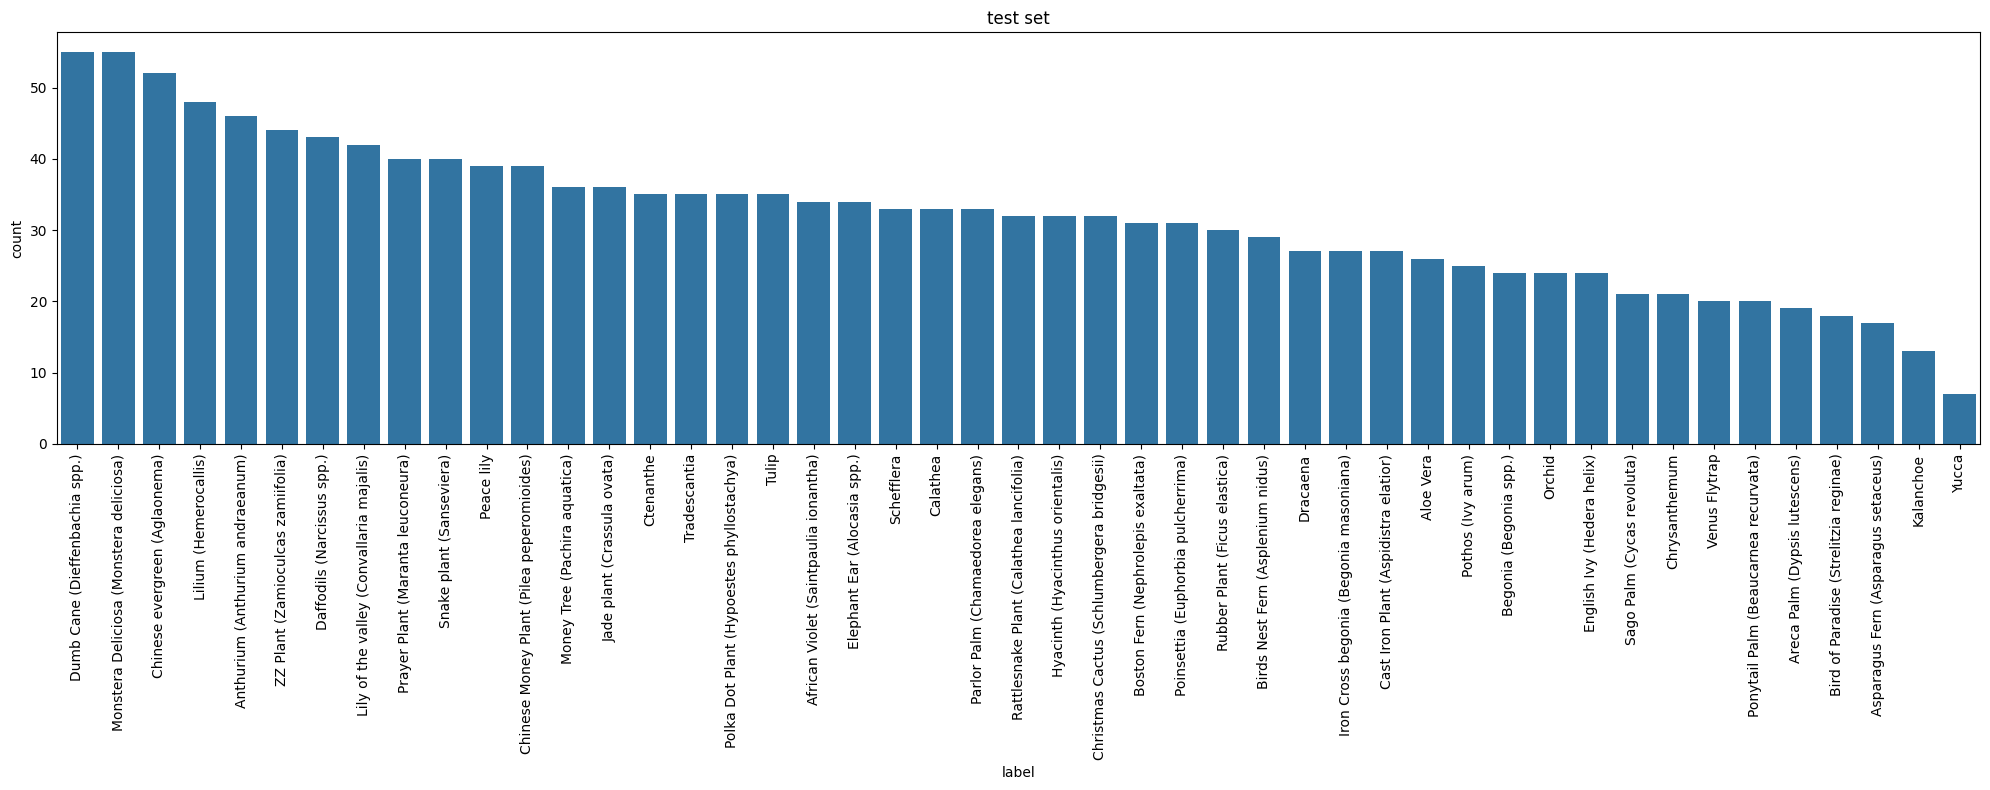

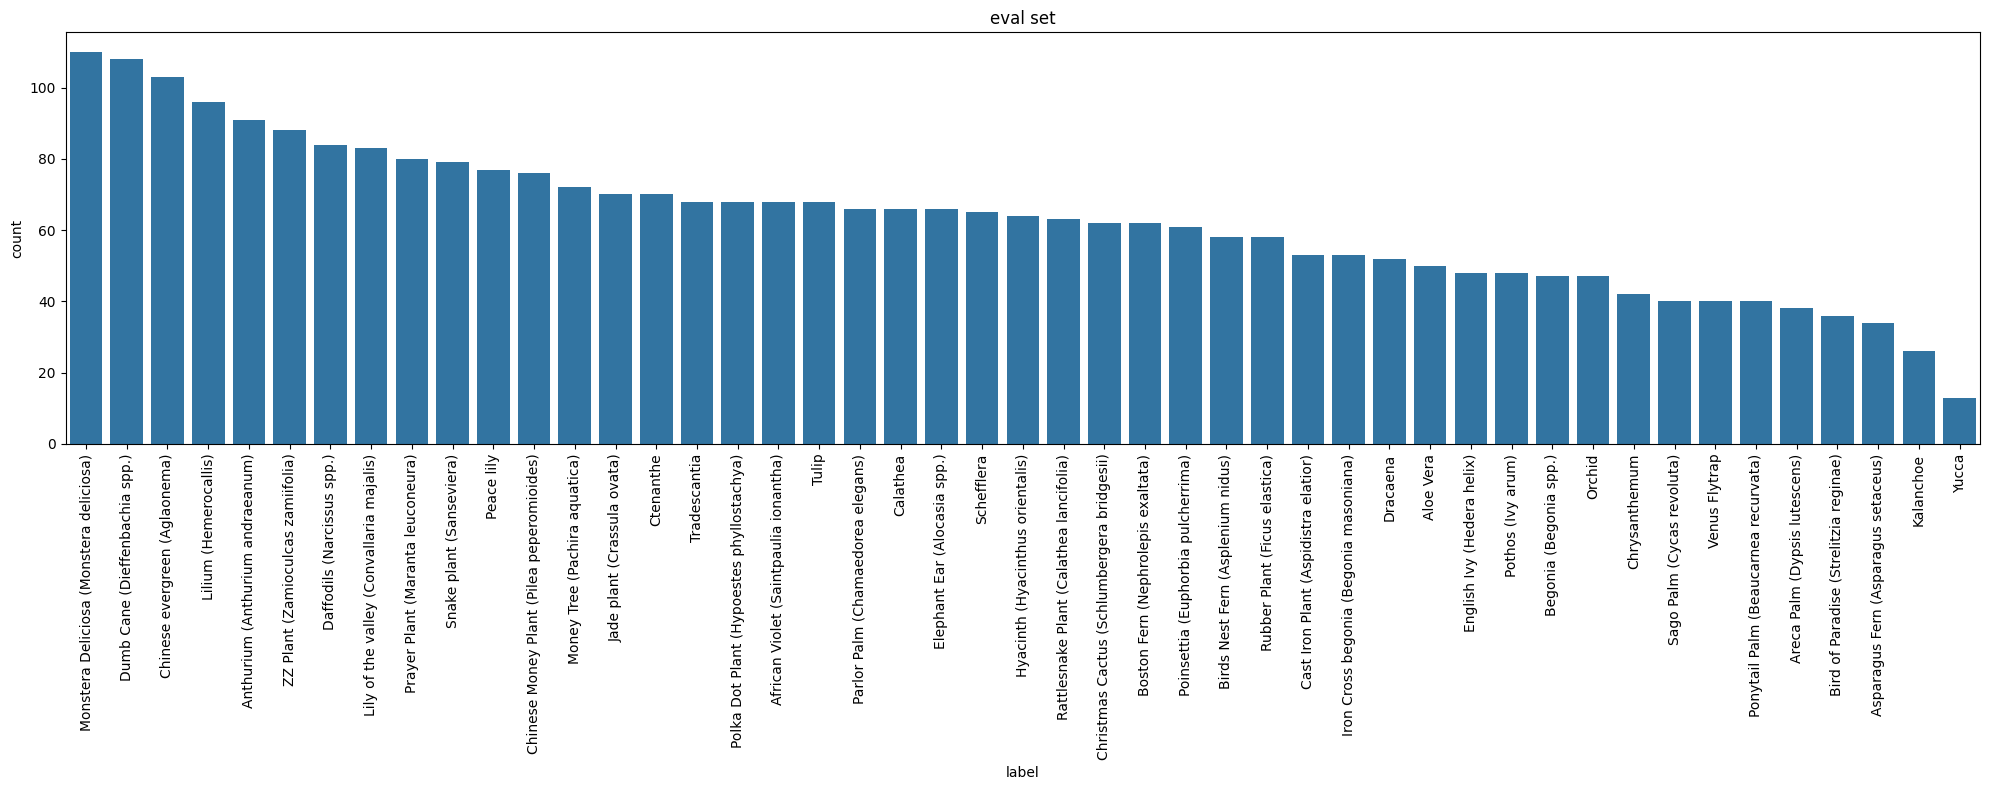

In [4]:
def display_distribution(dataset_df, name):
    sorted_counts = dataset_df['label'].value_counts().sort_values(ascending=False)
    plt.figure(figsize=(20, 8))
    sns.countplot(x=dataset_df['label'], order=sorted_counts.index)
    plt.title(name)
    plt.xticks(rotation=90, fontsize=10)
    plt.tight_layout()
    plt.show()

display_distribution(train_df, "train set")
display_distribution(test_df, "test set")
display_distribution(val_df, "eval set")

In [ ]:
from dataset import PlantDataset
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.406], std=[0.229, 0.224, 0.225])
])

train_ds = PlantDataset(train_df, transform= transform)
val_ds = PlantDataset(val_df, transform= transform)
test_ds = PlantDataset(test_df, transform= transform)

BATCH_SIZE = 16
NUM_WORKERS = os.cpu_count()
APPLY_SHUFFLE = True

train_loader = DataLoader(
    dataset = train_ds,
    batch_size = BATCH_SIZE,
    num_workers = NUM_WORKERS,
    shuffle = APPLY_SHUFFLE
)

val_loader = DataLoader(
    dataset = val_ds,
    batch_size = BATCH_SIZE,
    num_workers = NUM_WORKERS,
    shuffle = APPLY_SHUFFLE
)

test_loader = DataLoader(
    dataset = test_ds,
    batch_size = BATCH_SIZE,
    num_workers = NUM_WORKERS,
    shuffle = APPLY_SHUFFLE
)

TypeError: '<' not supported between instances of 'builtin_function_or_method' and 'int'